<a href="https://colab.research.google.com/github/augustoaccorsi/autoscaling/blob/main/arima_test_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [306]:
#https://www.kaggle.com/minhvo/arima-model-for-time-series-forecasting

#pip install pmdarima

In [307]:
pip install pmdarima

In [308]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt


In [309]:
data_xls = pd.read_excel('/content/cpu.xlsx', 'Sheet1', dtype=str, index_col=None)
data_xls.to_csv('/content/csvfile.csv', encoding='utf-8', index=False) 
df=pd.read_csv('/content/csvfile.csv', index_col='date',parse_dates=True)

df=df.dropna()
print('Shape of data',df.shape)
#df.head()
df.tail()

Shape of data (217, 1)


,value
date,
2021-04-23 07:24:06,0.1667
2021-04-23 07:24:06,0.3226
2021-04-23 07:24:08,0.3333
2021-04-23 07:26:09,0.3333
2021-04-23 07:28:11,0.3333


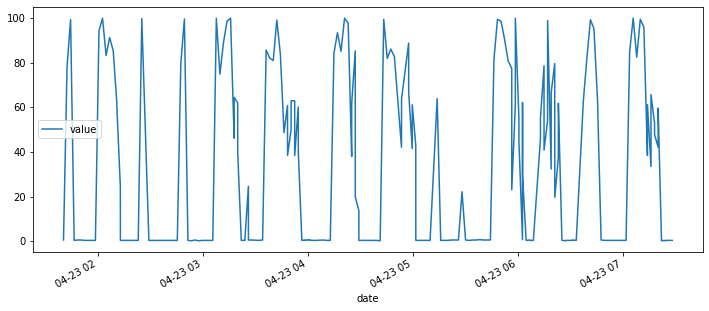

In [310]:
df.plot(figsize=(12,5))
plt.show()

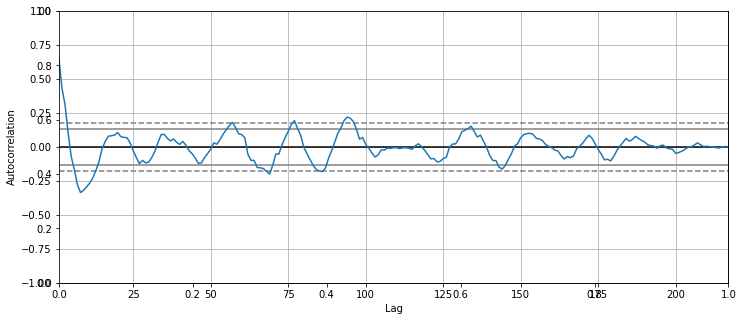

In [311]:
from pandas.plotting import autocorrelation_plot

plt.subplots(figsize=(12, 5))
autocorrelation_plot(df)
plt.show()

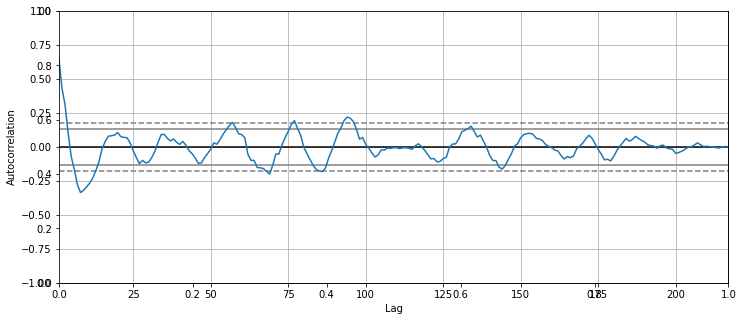

In [312]:
plt.subplots(figsize=(12, 5))
pd.plotting.autocorrelation_plot(df)
plt.show()

In [313]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
   dftest = adfuller(dataset, autolag = 'AIC')
   print("1. ADF : ",dftest[0])
   if  dftest[1] < 0.05:
      print("2. P-Value : "+ str(dftest[1])+" OK")
   else:
      print("2. P-Value : ", dftest[1])
   print("3. Num Of Lags : ", dftest[2])
   print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
   print("5. Critical Values :")
   for key, val in dftest[4].items():
      print("\t",key, ": ", val)

#adf_test(df)

In [314]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [315]:
stepwise = auto_arima(df, trace=True, seasonal=True, suppress_warnings=True)  

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=2076.412, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2194.867, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2072.110, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2103.098, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2315.059, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2074.086, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2074.082, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2076.095, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2088.127, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.162 seconds


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  216
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1039.482
Method:                       css-mle   S.D. of innovations             29.756
Date:                Fri, 23 Apr 2021   AIC                           2092.965
Time:                        18:54:24   BIC                           2116.591
Sample:                             1   HQIC                          2102.510
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0982      1.355     -0.072      0.942      -2.755       2.558
ar.L1.D.value    -0.1837      0.068     -2.694      0.007      -0.317      -0.050
ar.L2.D.value    -0.1723      0.069     

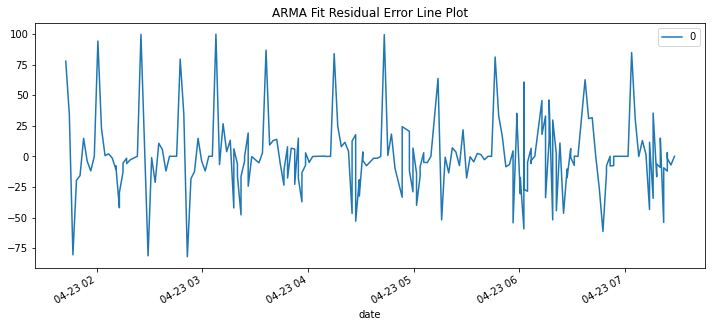

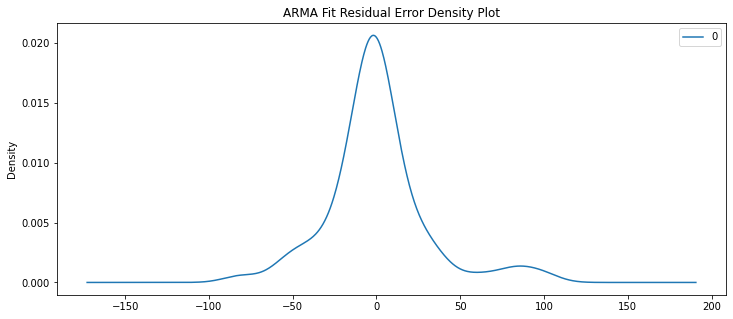

                0
count  216.000000
mean     0.121600
std     29.879332
min    -81.845897
25%    -11.873580
50%     -0.016797
75%      7.933873
max     99.779456


In [316]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(12, 5))
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde', figsize=(12, 5))
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

143
74
Test MSE: 811.803
71.50784954695288


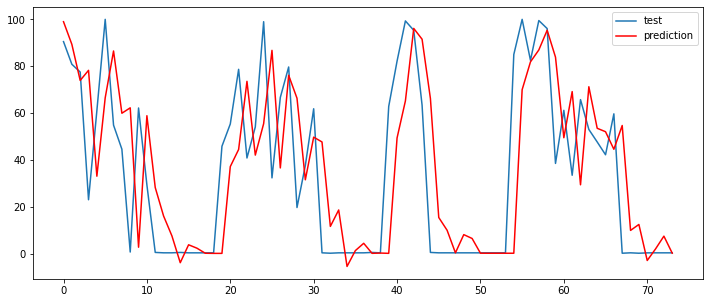

In [317]:
# Ignore harmless warnings
import warnings
import math
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size : len(X)]

print(len(train))
print(len(test))

history = [x for x in train]
predictions = list()

model_fit = None
model = None
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=1)
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

    #print("predicted=%f, expected=%f" % (yhat, obs))

error = mean_squared_error(test, predictions)
print("Test MSE: %.3f" % error)
print(100 - math.sqrt(error))

# plot
plt.subplots(figsize=(12, 5))
plt.plot(test)
plt.plot(predictions, color="red")
plt.legend(["test", "prediction"])
plt.show()




In [318]:
print(predictions)

[array([98.99423405]), array([89.34030397]), array([73.92707775]), array([78.23477345]), array([33.04426365]), array([66.51402199]), array([86.49938833]), array([59.92426727]), array([62.23674778]), array([2.73228264]), array([58.86445759]), array([28.20391053]), array([16.0701383]), array([7.56314727]), array([-3.87958795]), array([3.7701939]), array([2.31810672]), array([0.15679085]), array([0.10272371]), array([0.10400987]), array([37.14808171]), array([44.459022]), array([73.54347952]), array([42.05459583]), array([55.46115052]), array([86.76433791]), array([36.57395298]), array([76.11073078]), array([66.33205927]), array([31.51137206]), array([49.72086858]), array([47.65762903]), array([11.61488787]), array([18.62965666]), array([-5.477679]), array([1.28828474]), array([4.40298467]), array([0.11971141]), array([0.23606753]), array([0.11972343]), array([49.37136052]), array([65.18181433]), array([96.12937022]), array([91.5198144]), array([66.22594244]), array([15.42174224]), array(

In [319]:
print(model_fit.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0986      1.362     -0.072      0.942      -2.768       2.570
ar.L1.D.y     -0.1837      0.068     -2.688      0.007      -0.318      -0.050
ar.L2.D.y     -0.1723      0.069     -2.488      0.013      -0.308      -0.037
ar.L3.D.y      0.0414      0.071      0.580      0.562      -0.098       0.181
ar.L4.D.y     -0.0650      0.071     -0.920      0.357      -0.203       0.073
ar.L5.D.y     -0.1202      0.069     -1.732      0.083      -0.256       0.016


In [320]:
#model_fit.plot_predict()
#plt.show()

In [321]:
pred=model.predict(history, start=len(df),end=len(df)+10)#.rename('ARIMA Predictions')
print(pred)

[-8.63435892e+01 -6.83665648e+03 -5.43063045e+05 -4.31286700e+07
 -3.42517246e+09 -2.72018726e+11 -2.16030545e+13 -1.71566116e+15
 -1.36253566e+17 -1.08209213e+19 -8.59370805e+20 -6.82491040e+22]


In [322]:
  pred=model_fit.forecast(steps=3)#.rename('ARIMA Predictions')
print(pred)

(array([ 0.1804624 ,  0.07164055, -0.04940757]), array([29.82514443, 38.49966849, 43.48393703]), array([[-58.27574653,  58.63667132],
       [-75.38632311,  75.52960422],
       [-85.27635805,  85.17754291]]))
